In [14]:
#For analysing
import numpy as np
import scipy 
import matplotlib.pyplot as plt

#for file finding
import os 
import glob
import re

#Shendruk styling
plt.style.use('shendrukGroupStyle')
import shendrukGroupFormat as ed

from jones import *
from polyAnalyser import *

Batch processing

In [15]:
def process_all_simulations_simple(base_dir, base_sim_dir, timeSteps):
    #base_dir = "/Users/johnwhitfield/Desktop/localSims/n24/output"

    unKnotTimes=[]
    
    # Get all simulation directories
    #sim_dirs = glob.glob(os.path.join(base_dir, "XYZ_knot3_1.n24.*_output"))
    sim_dirs = glob.glob(os.path.join(base_dir, base_sim_dir))
    
    # Better sorting using regex to extract the number
    def extract_number(path):
        # Match the number after the last dot and before _output
        match = re.search(r'\.(\d+)_output', path)
        if match:
            return int(match.group(1))
        return 0  # Default if no match
    
    sim_dirs_sorted = sorted(sim_dirs, key=extract_number)
    
    print(f"Found {len(sim_dirs_sorted)} simulation directories")
    
    #to track sim number being analysed
    i=1
    for sim_dir in sim_dirs_sorted:
        # Extract the simulation parameter using regex
        match = re.search(r'\.(\d+)_output', sim_dir)
        if match:
            sim_param = match.group(1)
        else:
            sim_param = "unknown"
            
        #print(f"\nProcessing: {sim_param}")
        print(f"Sim {i} being processed")
        i+=1
        
        # Find the timestamp subdirectory
        for item in os.listdir(sim_dir):
            item_path = os.path.join(sim_dir, item)
            if os.path.isdir(item_path) and item.replace('-', '').isdigit():
                vtf_file = os.path.join(item_path, f"{item}-vmd.vtf")
                if os.path.exists(vtf_file):
                    #print(f"  Analyzing: {vtf_file}")
                    try:
                        a = polyAnalyser(vtf_file, timeSteps)
                        unknot_time = a.getUnknotTime()
                        unKnotTimes.append(unknot_time)
                        #print(f"  Unknot time: {unknot_time}")
                    except Exception as e:
                        print(f"  ERROR: {e}")
                        #assign some conventional value of -1 for no unknotting detected
                        unKnotTimes.append(-1)
                    break  # Only process first matching directory
                else:
                    print(f"  VTF file not found: {vtf_file}")
        else:
            print(f"  No timestamp directory found in {sim_dir}")

    return unKnotTimes

In [16]:
n24unknotTimes=process_all_simulations_simple("/Users/johnwhitfield/Desktop/localSims/n24/output", "XYZ_knot3_1.n24.*_output", 1500)

Found 30 simulation directories
Sim 1 being processed
{0: np.float64(1.0)} found unknotting at t=  8.6
Sim 2 being processed
{0: np.float64(1.0)} found unknotting at t=  10.1
Sim 3 being processed
{0: np.float64(1.0)} found unknotting at t=  2.3
Sim 4 being processed
{0: np.float64(1.0)} found unknotting at t=  3.3
Sim 5 being processed
{0: np.float64(1.0)} found unknotting at t=  10.7
Sim 6 being processed
{0: np.float64(1.0)} found unknotting at t=  3.8
Sim 7 being processed
{0: np.float64(1.0)} found unknotting at t=  4.8
Sim 8 being processed
{0: np.float64(1.0)} found unknotting at t=  2.0
Sim 9 being processed
{0: np.float64(1.0)} found unknotting at t=  4.5
Sim 10 being processed
{0: np.float64(1.0)} found unknotting at t=  6.0
Sim 11 being processed
{0: np.float64(1.0)} found unknotting at t=  2.1
Sim 12 being processed
{0: np.float64(1.0)} found unknotting at t=  1.6
{0: np.float64(1.0)} found unknotting at t=  3.0
Sim 13 being processed
{0: np.float64(1.0)} found unknotting a

In [17]:
n30unknotTimes=process_all_simulations_simple("/Users/johnwhitfield/Desktop/localSims/n30/output", "XYZ_knot3_1.n30.*_output", 4000)

Found 30 simulation directories
Sim 1 being processed
{0: np.float64(1.0)} found unknotting at t=  12.4
Sim 2 being processed
{0: np.float64(1.0)} found unknotting at t=  48.6
Sim 3 being processed
{0: np.float64(1.0)} found unknotting at t=  40.2
Sim 4 being processed
{0: np.float64(1.0)} found unknotting at t=  0.8
{0: np.float64(1.0)} found unknotting at t=  5.3
Sim 5 being processed
{0: np.float64(1.0)} found unknotting at t=  2.1
Sim 6 being processed
{0: np.float64(1.0)} found unknotting at t=  16.9
Sim 7 being processed
  ERROR: 't'
Sim 8 being processed
  ERROR: 't'
Sim 9 being processed
{0: np.float64(1.0)} found unknotting at t=  7.9
Sim 10 being processed
{0: np.float64(1.0)} found unknotting at t=  14.9
Sim 11 being processed
{0: np.float64(1.0)} found unknotting at t=  2.2
Sim 12 being processed
{0: np.float64(1.0)} found unknotting at t=  7.4
Sim 13 being processed
{0: np.float64(1.0)} found unknotting at t=  4.1
Sim 14 being processed
{0: np.float64(1.0)} found unknottin

In [18]:
n36unknotTimes=process_all_simulations_simple("/Users/johnwhitfield/Desktop/localSims/n36/output", "XYZ_knot3_1.n36.*_output", 4000)

Found 30 simulation directories
Sim 1 being processed
{0: np.float64(1.0)} found unknotting at t=  1.2
{0: np.float64(1.0)} found unknotting at t=  8.8
Sim 2 being processed
{0: np.float64(1.0)} found unknotting at t=  2.9
Sim 3 being processed
{0: np.float64(1.0)} found unknotting at t=  1.7
{0: np.float64(1.0)} found unknotting at t=  9.2
Sim 4 being processed
{0: np.float64(1.0)} found unknotting at t=  5.6
Sim 5 being processed
{0: np.float64(1.0)} found unknotting at t=  24.3
Sim 6 being processed
{0: np.float64(1.0)} found unknotting at t=  21.2
Sim 7 being processed
{0: np.float64(1.0)} found unknotting at t=  5.1
Sim 8 being processed
{0: np.float64(1.0)} found unknotting at t=  4.8
Sim 9 being processed
{0: np.float64(1.0)} found unknotting at t=  0.6
{0: np.float64(1.0)} found unknotting at t=  6.5
Sim 10 being processed
{0: np.float64(1.0)} found unknotting at t=  5.5
Sim 11 being processed
{0: np.float64(1.0)} found unknotting at t=  11.6
Sim 12 being processed
{0: np.float

Histogram(s)

[8.6, 10.1, 2.3, 3.3, 10.7, 3.8, 4.8, 2.0, 4.5, 6.0, 2.1, 3.0, 6.4, 5.2, 3.8, 3.1, 8.0, 4.5, -1, 6.9, 8.0, 8.9, 3.0, 8.8, 5.3, 20.8, -1, 4.3, 2.5, 10.1] 30


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/2073621836.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$t_\mathrm{unknot}$')


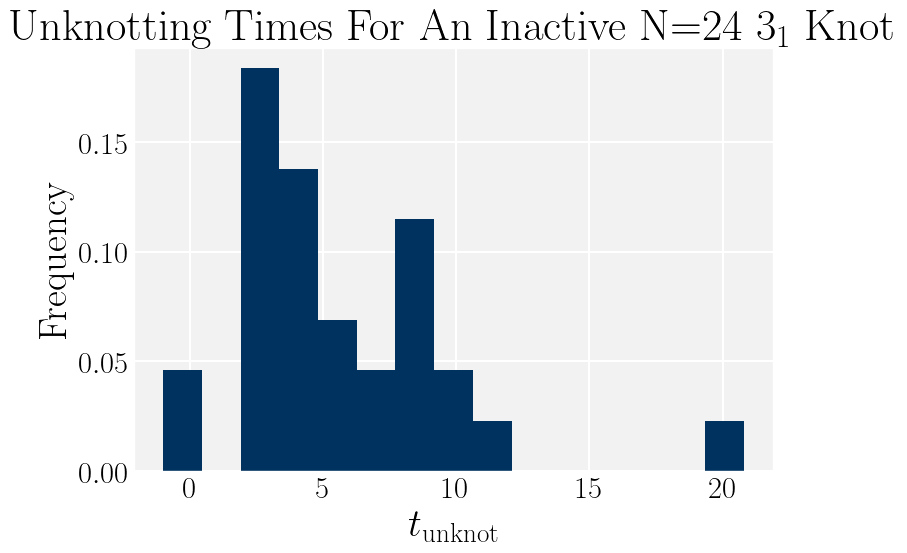

In [19]:
print(n24unknotTimes, len(n24unknotTimes))
plt.hist(n24unknotTimes, bins=len(n24unknotTimes)//2, density=True)
plt.xlabel('$t_\mathrm{unknot}$')
plt.ylabel('Frequency')
plt.title('Unknotting Times For An Inactive N=24 $3_1$ Knot')
plt.show()

[12.4, 48.6, 40.2, 5.3, 2.1, 16.9, -1, -1, 7.9, 14.9, 2.2, 7.4, 4.1, 9.3, 2.7, 12.5, 6.1, 9.8, 12.2, 2.1, 9.4, 2.1, 13.8, 3.8, 9.4, 14.6, -1, -1, -1, -1] 30


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/3230204730.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$t_\mathrm{unknot}$')


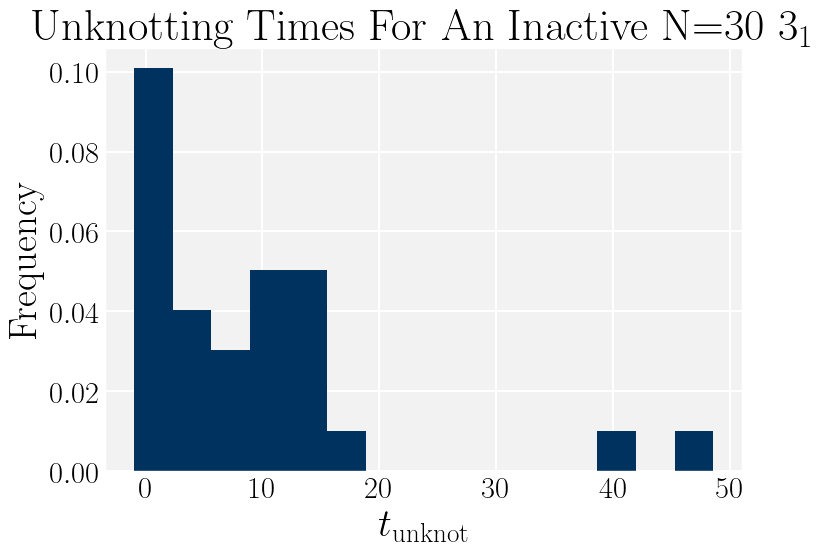

In [20]:
print(n30unknotTimes, len(n30unknotTimes))
plt.hist(n30unknotTimes, bins=len(n30unknotTimes)//2, density=True)
plt.xlabel('$t_\mathrm{unknot}$')
plt.ylabel('Frequency')
plt.title('Unknotting Times For An Inactive N=30 $3_1$')
plt.show()

[8.8, 2.9, 9.2, 5.6, 24.3, 21.2, 5.1, 4.8, 6.5, 5.5, 11.6, 30.7, 12.1, 4.9, 5.1, 4.2, 8.5, 10.9, 4.6, 15.5, 3.5, 3.7, 9.9, 2.1, 13.1, 14.2, 2.4, 7.3, 2.8, -1] 30


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/3181831969.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$t_\mathrm{unknot}$')


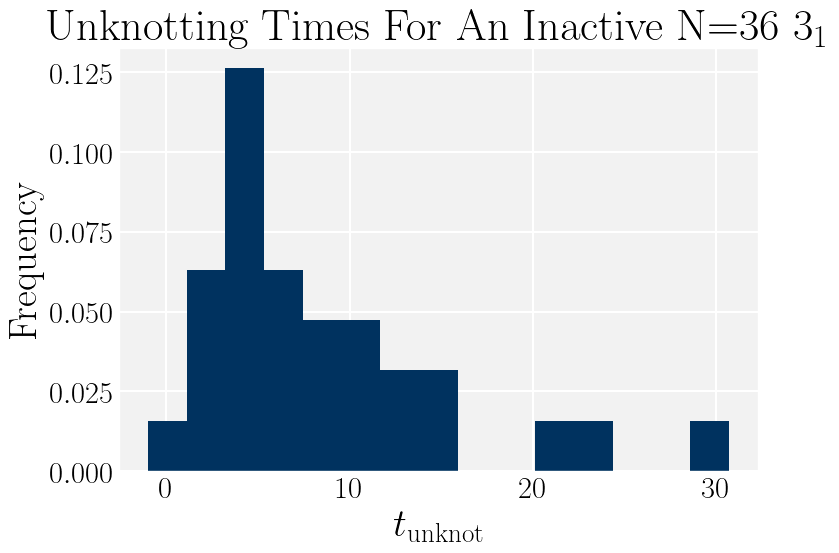

In [21]:
print(n36unknotTimes, len(n36unknotTimes))
plt.hist(n36unknotTimes, bins=len(n36unknotTimes)//2, density=True)
plt.xlabel('$t_\mathrm{unknot}$')
plt.ylabel('Frequency')
plt.title('Unknotting Times For An Inactive N=36 $3_1$')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/1147392318.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$t_\mathrm{unknot}$')


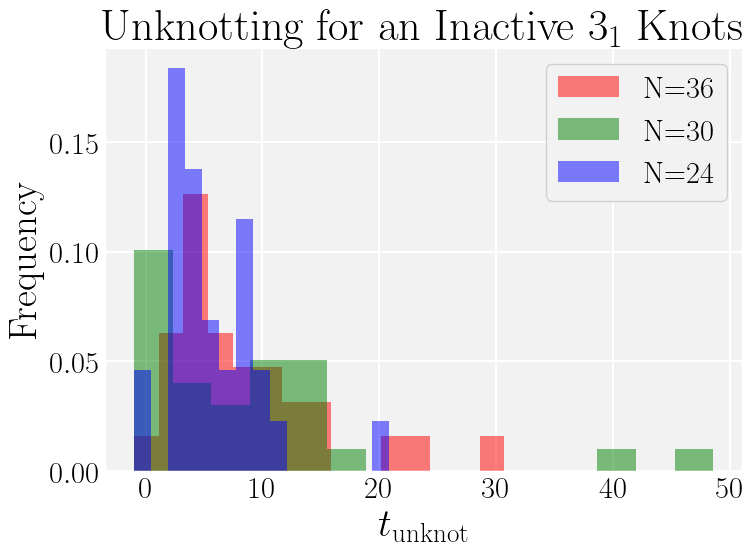

In [22]:
plt.hist(n36unknotTimes, bins=len(n36unknotTimes)//2, density=True, color='red', alpha=0.5, label='N=36')
plt.hist(n30unknotTimes, bins=len(n30unknotTimes)//2, density=True, color='green', alpha=0.5, label='N=30')
plt.hist(n24unknotTimes, bins=len(n24unknotTimes)//2, density=True, color='blue', alpha=0.5, label='N=24')
plt.xlabel('$t_\mathrm{unknot}$')
plt.ylabel('Frequency')
plt.title('Unknotting for an Inactive $3_1$ Knots')
plt.legend(loc="upper right")
plt.show()

Getting N against average unknot time

In [23]:
#get all non -1 values and get average and standard deviation
#print(n24unknotTimes)
n24unknotTimesClipped=[i for i in n24unknotTimes if i != -1]#; print(len(n24unknotTimesClipped))
n24avg=np.average(n24unknotTimesClipped)
n24std=np.std(n24unknotTimesClipped)

n30unknotTimesClipped=[i for i in n30unknotTimes if i != -1]#; print(len(n24unknotTimesClipped))
n30avg=np.average(n30unknotTimesClipped)
n30std=np.std(n30unknotTimesClipped)

#print("\n", n36unknotTimes)
n36unknotTimesClipped=[i for i in n36unknotTimes if i != -1]#; print(len(n36unknotTimesClipped))
n36avg=np.average(n36unknotTimesClipped)
n36std=np.std(n36unknotTimesClipped)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/124725721.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$t_\mathrm{unknot}$')


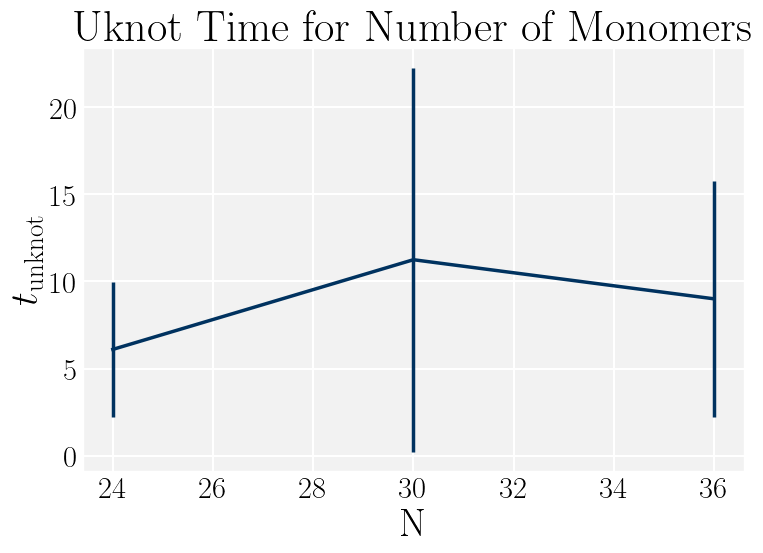

In [26]:
plt.errorbar([24, 30, 36], [n24avg, n30avg, n36avg], [n24std, n30std, n36std])
plt.xlabel('N')
plt.ylabel('$t_\mathrm{unknot}$')
plt.title('Uknot Time for Number of Monomers')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/r2/ssbd733d3y7cqh5q583b4wbw0000gn/T/ipykernel_3235/3185190895.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$t_\mathrm{unknot}$')


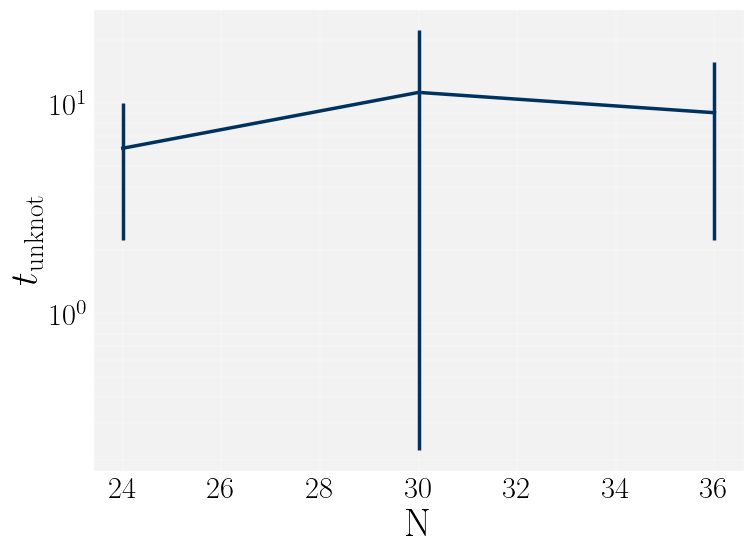

In [30]:
plt.errorbar([24, 30, 36], [n24avg, n30avg, n36avg], [n24std, n30std, n36std])
plt.yscale('log')  # Only y-axis log scale
plt.xlabel('N')
plt.ylabel('$t_\mathrm{unknot}$')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()